In [85]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import tensorflow
import sklearn
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix


In [61]:

# Define the paths to the data directory
data_dir = '/Users/hellokhanhne/Documents/project/py/mask_detection/data/'

# Load the dataset
p = Path(data_dir)
dirs = p.glob("*")
labels_dict = {'IncorrectlyWornMask':0,'WithMask':1,'WithoutMask':2 }
image_data = [] 
labels = []
for folder_dir in dirs:
    print(str(folder_dir))
    label = str(folder_dir).split("/")[-1] 
    print("Loading images from folder:", label)
    for img_path in folder_dir.glob("*"):
        try:
           img = cv2.imread("" + str(img_path))
           img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
           img = cv2.resize(img, (64, 64))
           image_data.append(img)
           labels.append(labels_dict[label])
        except Exception as e:
            print("Error loading image:", str(img_path))
            print("Error message:", str(e))



CATEGORIES = ['IncorrectlyWornMask', 'WithMask', 'WithoutMask']




/Users/hellokhanhne/Documents/project/py/mask_detection/data/IncorrectlyWornMask
Loading images from folder: IncorrectlyWornMask
Error loading image: /Users/hellokhanhne/Documents/project/py/mask_detection/data/IncorrectlyWornMask/.DS_Store
Error message: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/Users/hellokhanhne/Documents/project/py/mask_detection/data/.DS_Store
Loading images from folder: .DS_Store
/Users/hellokhanhne/Documents/project/py/mask_detection/data/WithoutMask
Loading images from folder: WithoutMask
Error loading image: /Users/hellokhanhne/Documents/project/py/mask_detection/data/WithoutMask/.DS_Store
Error message: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/Users/hellokhanhne/D

libpng warning: iCCP: known incorrect sRGB profile


In [62]:
# double check to see the types of the loaded files
X = np.array(image_data)
y = np.array(labels)

print('Type of X:', type(X))
print('Type of y:', type(y))
y.shape

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


(5995,)

In [63]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (5995, 64, 64)
Shape of y: (5995,)


In [64]:
# print one example of dataset
print('X:')
print(X[13])
print('y:')
print(y[13])

X:
[[115 100  60 ...  86 106 109]
 [113 113  66 ... 115 134 130]
 [107 117  72 ... 151 162 151]
 ...
 [163 161 161 ... 149 213 223]
 [185 186 187 ... 245 245 250]
 [226 229 231 ... 213 243 242]]
y:
0


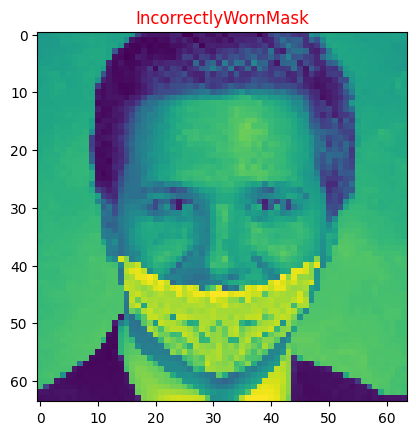

In [66]:
# Display the one example
plt.imshow(X[10])
plt.title(CATEGORIES[y[10]], color='red')
print('')

#### EDA

In [67]:
X = np.asarray(X)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

(5995, 64, 64, 1)


In [68]:
# normalize the pixel values
X = X / 255.0

In [69]:
IMG_DIM = X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [70]:
# Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

Training Size: 4796
Testing  Size: 1199


#### Building and fitting the CNN Model 

In [72]:
cnn_model = tensorflow.keras.models.Sequential()

In [73]:
# Start of Convolution Layers & Maxpooling
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

# Start of Neural Nets
cnn_model.add(tensorflow.keras.layers.Flatten())

cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [74]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                 

In [75]:
# Compile the Model
cnn_model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [76]:
# Train Model
epochs = 10
cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/10
135/135 [==============================] - 22s 158ms/step - loss: 0.8731 - acc: 0.5665 - val_loss: 0.5857 - val_acc: 0.7667
Epoch 2/10
135/135 [==============================] - 22s 161ms/step - loss: 0.5129 - acc: 0.7908 - val_loss: 0.4734 - val_acc: 0.7771
Epoch 3/10
135/135 [==============================] - 22s 166ms/step - loss: 0.3810 - acc: 0.8443 - val_loss: 0.3553 - val_acc: 0.8479
Epoch 4/10
135/135 [==============================] - 23s 167ms/step - loss: 0.3192 - acc: 0.8821 - val_loss: 0.3150 - val_acc: 0.8583
Epoch 5/10
135/135 [==============================] - 23s 172ms/step - loss: 0.2734 - acc: 0.8881 - val_loss: 0.2650 - val_acc: 0.8896
Epoch 6/10
135/135 [==============================] - 23s 172ms/step - loss: 0.2392 - acc: 0.9055 - val_loss: 0.2413 - val_acc: 0.9021
Epoch 7/10
135/135 [==============================] - 23s 173ms/step - loss: 0.2001 - acc: 0.9240 - val_loss: 0.2403 - val_acc: 0.9250
Epoch 8/10
135/135 [==============================] - 2

#### Evalute Performance

In [77]:
# Evaluate performance
cnn_model.evaluate(X_test, y_test)

38/38 [==============================] - 2s 43ms/step - loss: 0.2294 - acc: 0.9266


[0.22942906618118286, 0.9266055226325989]

In [84]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)
y_pred

38/38 [==============================] - 2s 42ms/step


array([2, 2, 1, ..., 2, 0, 0])

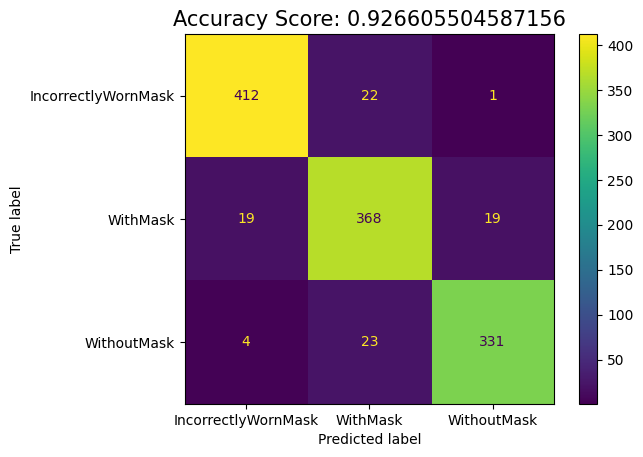

In [87]:

from sklearn.metrics import ConfusionMatrixDisplay
# plot_confusion_matrix
class_names = ['IncorrectlyWornMask', 'WithMask','WithoutMask']

cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cnf_matrix,display_labels = class_names)
disp.plot()
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title,size=15)
plt.show()

#### Save model for future use

In [80]:
path = './cnn/model.h5'
cnn_model.save(path)



/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 45ms/step



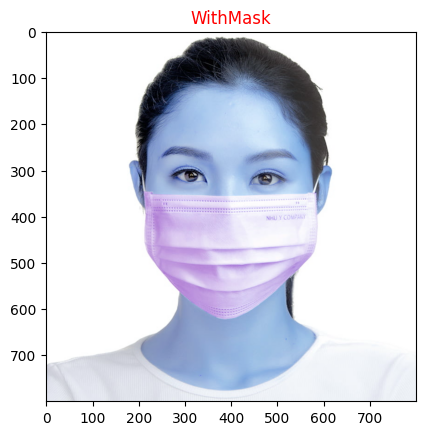

In [101]:
urlread = cv2.imread(("/Users/hellokhanhne/Documents/project/py/mask_detection/imgthucte/4-layer-medical-face-mask-pink.jpeg"))
img = cv2.cvtColor(urlread, cv2.COLOR_RGB2GRAY)
img = cv2.resize(img, (64, 64))

test = np.array([img])
test = np.asarray(test)
test = test.reshape(-1, 64, 64, 1)
test = test / 255



model = tensorflow.keras.models.load_model(path)
test_pred = np.argmax(model.predict(test), axis=-1)


plt.imshow(urlread)
plt.title(CATEGORIES[test_pred[0]], color='red')
print('')